In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
train = pd.read_csv(r"C:\Users\chasm\Downloads\archive\drugsComTrain_raw.csv")
test = pd.read_csv(r"C:\Users\chasm\Downloads\archive\drugsComTest_raw.csv")
train

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


In [57]:
train = pd.concat([train,test])
train

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [58]:
train.describe(include="all")

,uniqueID,drugName,condition,review,rating,date,usefulCount
count,215063.000000,215063,213869,215063,215063.000000,215063,215063.000000
unique,NaN,3671,916,128478,NaN,3579,NaN
top,NaN,Levonorgestrel,Birth Control,"""Good""",NaN,1-Mar-16,NaN
freq,NaN,4930,38436,39,NaN,185,NaN
mean,116039.364814,NaN,NaN,NaN,6.990008,NaN,28.001004
std,67007.913366,NaN,NaN,NaN,3.275554,NaN,36.346069
min,0.000000,NaN,NaN,NaN,1.000000,NaN,0.000000
25%,58115.500000,NaN,NaN,NaN,5.000000,NaN,6.000000
50%,115867.000000,NaN,NaN,NaN,8.000000,NaN,16.000000
75%,173963.500000,NaN,NaN,NaN,10.000000,NaN,36.000000


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [60]:
train.isnull().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

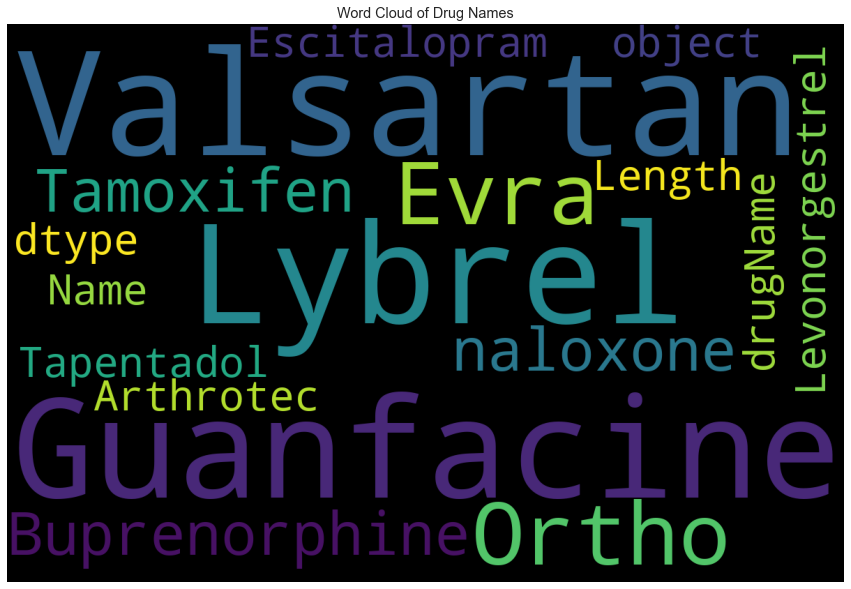

In [61]:
# Most popular Drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color="black", stopwords=stopwords, width=1200, height=800).generate(str(train["drugName"]))

plt.rcParams["figure.figsize"] = (15,15)
plt.title("Word Cloud of Drug Names")
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

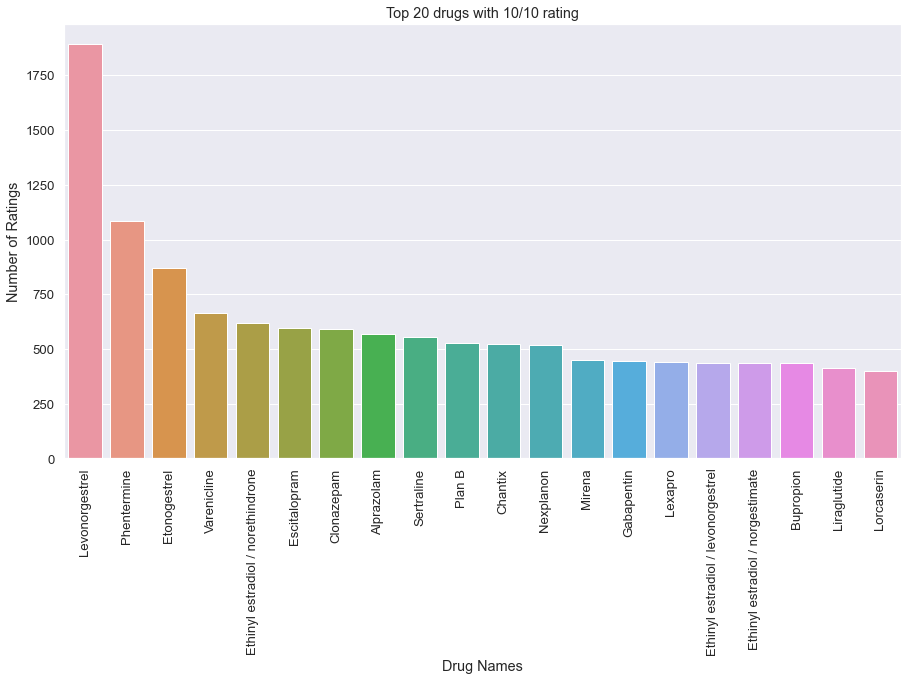

In [62]:
# Top 20 Drugs with 10/10 Ratings

#setting Parameters
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(train.loc[train.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);


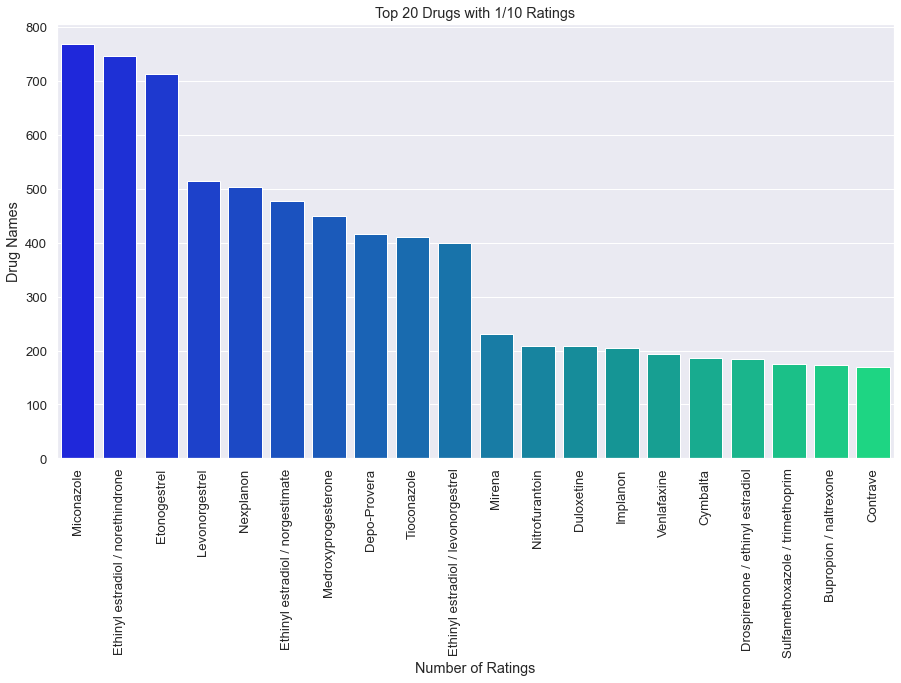

In [63]:
# Top 20 Drugs with 1/10 Ratings

# setiing the Parameters
sns.set(font_scale = 1.2, style = "darkgrid")
plt.rcParams["figure.figsize"] = [15,8]

rating = dict(train.loc[train.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x=drugname[0:20],y=drug_rating[0:20],palette="winter")

sns_rating.set_title("Top 20 Drugs with 1/10 Ratings")
sns_rating.set_xlabel("Number of Ratings")
sns_rating.set_ylabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(),rotation=90);

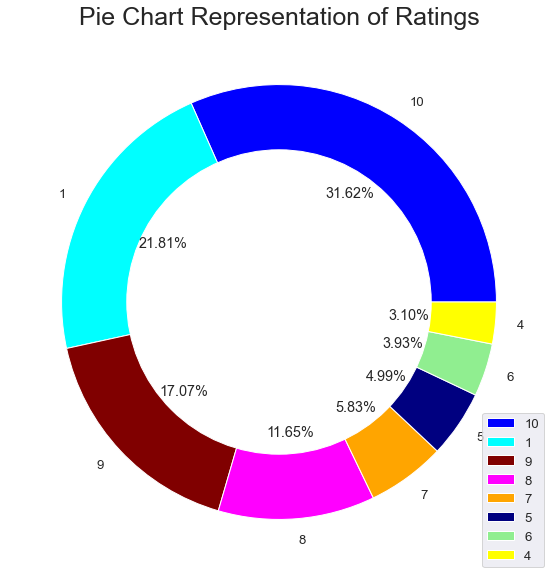

In [64]:
# Donut Chart to represents share of each Ratings
size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671]
colors = ["blue", 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow']
labels = "10","1","9","8","7","5","6","4"
my_circle = plt.Circle((0,0),0.7,color="white")
plt.rcParams["figure.figsize"]=(10,10)
plt.pie(size,colors=colors,labels=labels,autopct="%.2f%%")
plt.axis("off")
plt.title("Pie Chart Representation of Ratings",fontsize=25)
p=plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

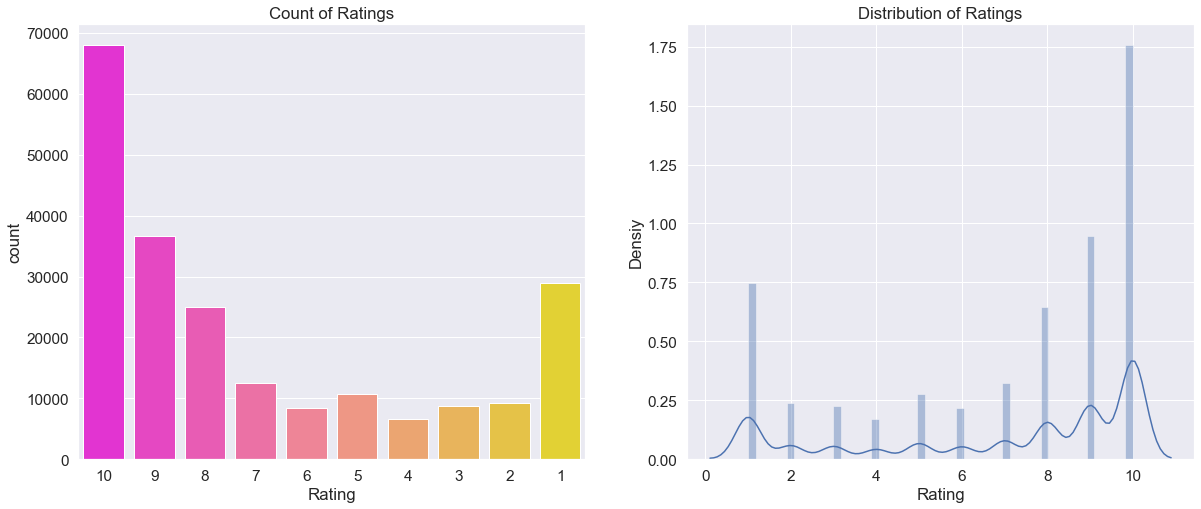

In [65]:
# A Countplot to get the number of Ratings
# A Distribution plot to understand the distrbution of rating
plt.rcParams["figure.figsize"] = [20,8]
sns.set(font_scale=1.4, style="darkgrid")
fig, ax = plt.subplots(1,2)

sns_1 = sns.countplot(train["rating"],palette="spring",order=list(range(10,0,-1)),ax=ax[0])
sns_2 = sns.distplot(train["rating"],ax=ax[1])
sns_1.set_title("Count of Ratings")
sns_2.set_title("Distribution of Ratings")
sns_1.set_xlabel("Rating")
sns_2.set_xlabel("Rating")
sns_2.set_ylabel("Densiy");

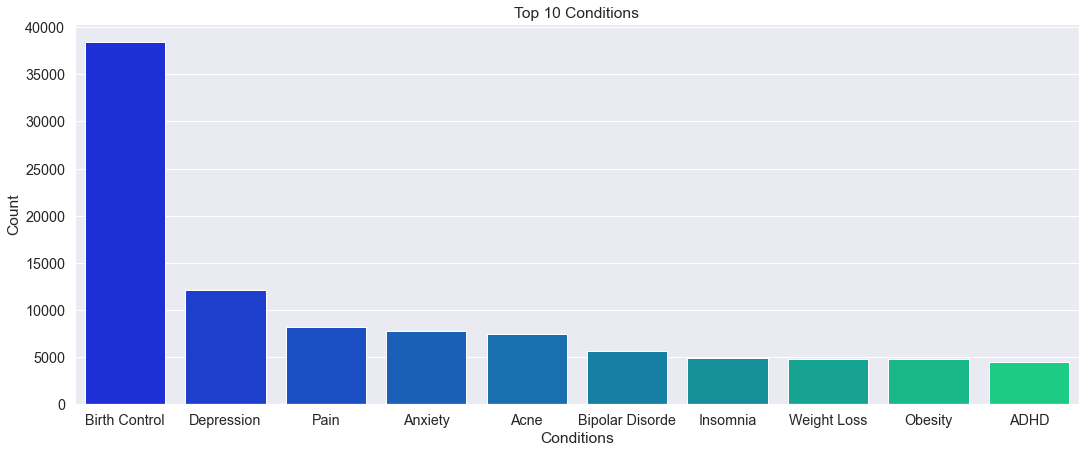

In [66]:
# Top 10 Conditions from which People are Suffering

cond = dict(train["condition"].value_counts())
top_cond = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(font_scale=1.3, style="darkgrid")
plt.rcParams["figure.figsize"] = [18,7]

sns_cond = sns.barplot(x=top_cond,y=values,palette="winter")
sns_cond.set_title("Top 10 Conditions")
sns_cond.set_xlabel("Conditions")
sns_cond.set_ylabel("Count");

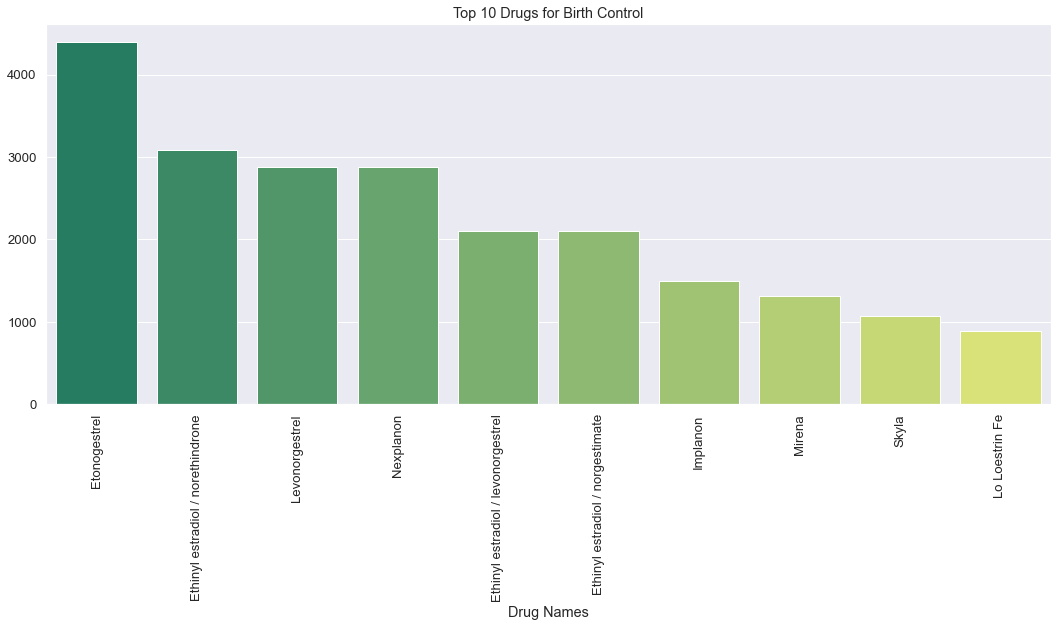

In [67]:
# Top 10 Drugs for the top Condition i.e., Birth Control

df1 = train[train["condition"]=="Birth Control"]["drugName"].value_counts()[0:10]
sns.set(font_scale=1.2,style="darkgrid")
sns_BC = sns.barplot(x=df1.index, y=df1.values, palette="summer")
sns_BC.set_title("Top 10 Drugs for Birth Control")
sns_BC.set_xlabel("Drug Names")
plt.setp(sns_BC.get_xticklabels(), rotation=90);

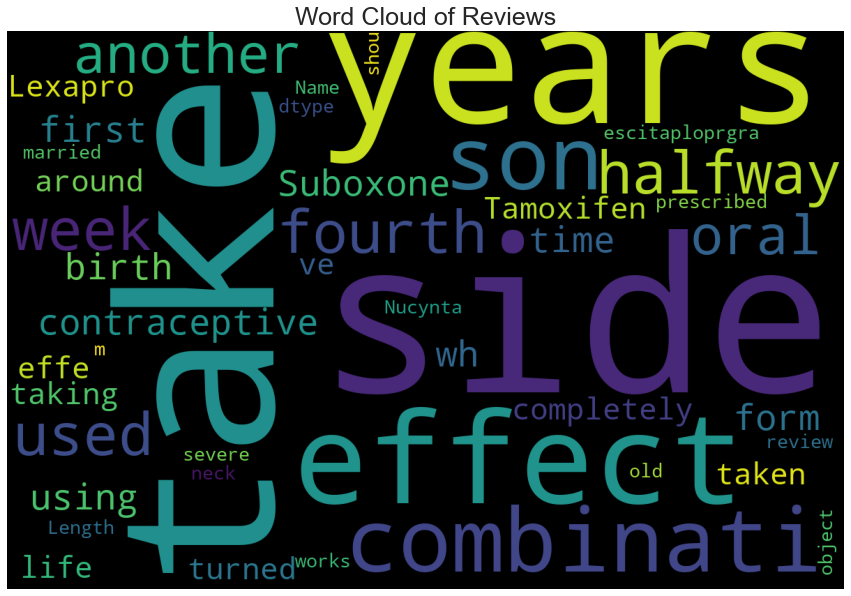

In [68]:
wordcloud = WordCloud(background_color="black", stopwords=stopwords, width=1200, height=800).generate(str(train["review"]))
plt.rcParams["figure.figsize"] = (15,15)
plt.title("Word Cloud of Reviews",fontsize=25)
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

In [69]:
# Feature Engineering
# Creating New Column Review Sentiment 

train.loc[(train["rating"]>=5),"Review_Sentiment"] = 1
train.loc[(train["rating"]<5),"Review_Sentiment"] = 0

train["Review_Sentiment"].value_counts()

1.0    161491
0.0     53572
Name: Review_Sentiment, dtype: int64

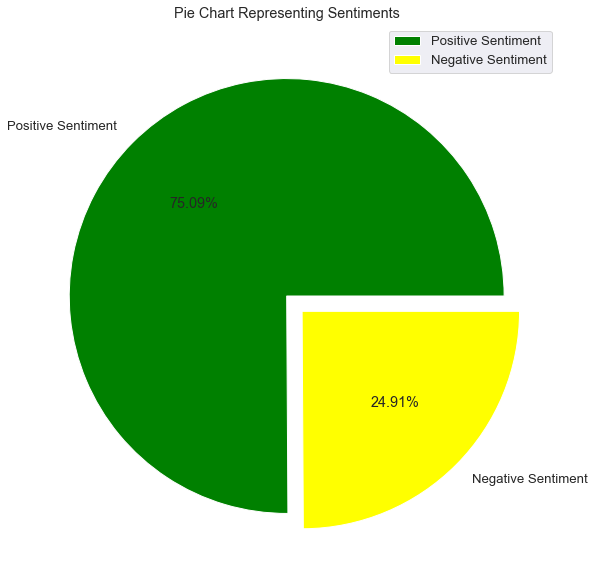

In [70]:
size = [161491,53572]
colors = ["green","yellow"]
labels = ["Positive Sentiment", "Negative Sentiment"]
explode = [0,0.1]

plt.rcParams["figure.figsize"] = (10,10)
plt.pie(size, colors=colors, labels=labels, explode=explode, autopct="%.2f%%")
plt.axis("off")
plt.title("Pie Chart Representing Sentiments")
plt.legend()
plt.show()

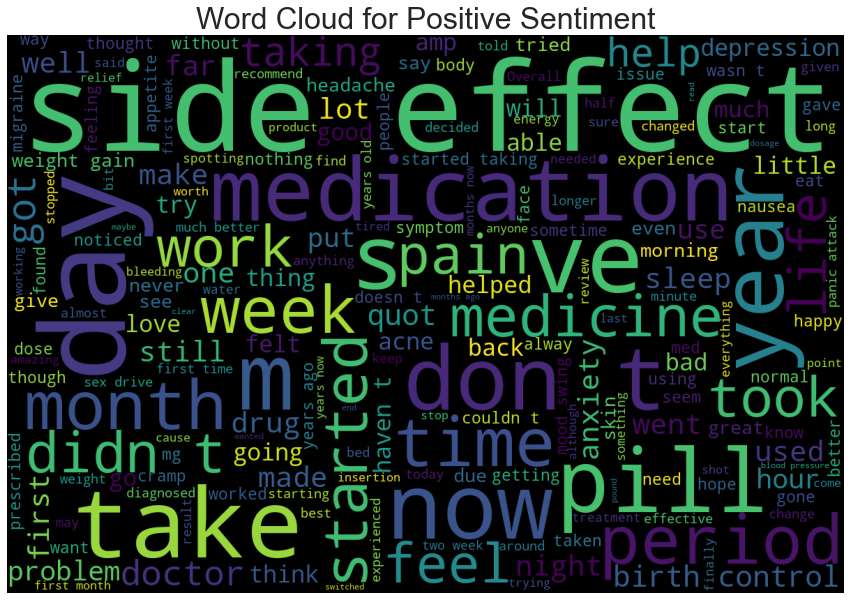

Wall time: 39.9 s


In [71]:
%%time
positive_sentiment = " ".join([text for text in train["review"][train["Review_Sentiment"]==1]])
                               
wordcloud = WordCloud(background_color="black", stopwords=stopwords, width=1200, height=800).generate(positive_sentiment)
plt.rcParams["figure.figsize"] = (15,15)
plt.title("Word Cloud for Positive Sentiment",fontsize=30)
plt.axis("off")
plt.imshow(wordcloud)
plt.show()                               

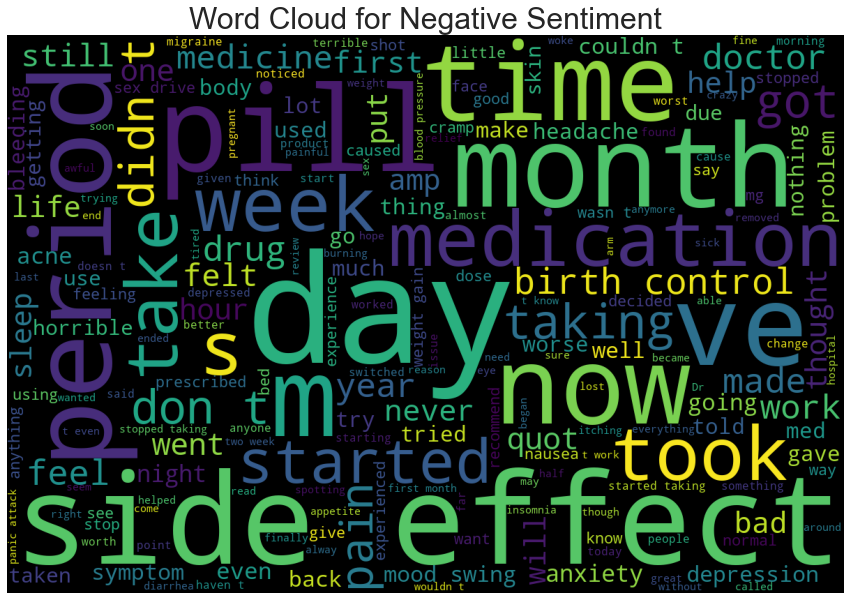

Wall time: 15.4 s


In [72]:
%%time
negative_sentiment = " ".join([text for text in train["review"][train["Review_Sentiment"]==0]])

wordcloud = WordCloud(background_color="black", stopwords=stopwords, width=1200, height=800).generate(negative_sentiment)
plt.rcParams["figure.figsize"] = (15,15)
plt.title("Word Cloud for Negative Sentiment",fontsize=30)
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

In [73]:
train["date"] = pd.to_datetime(train["date"], errors="coerce")

train["Year"] = train["date"].dt.year
train["Month"] = train["date"].dt.month
train["Days"] = train["date"].dt.day
train

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,Month,Days
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,1.0,2012,5,20
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1.0,2010,4,27
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,1.0,2009,12,14
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,1.0,2015,11,3
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,1.0,2016,11,27
...,...,...,...,...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,2014-09-13,43,1.0,2014,9,13
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,2016-10-08,11,1.0,2016,10,8
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,2010-11-15,7,1.0,2010,11,15
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,2011-11-28,20,0.0,2011,11,28


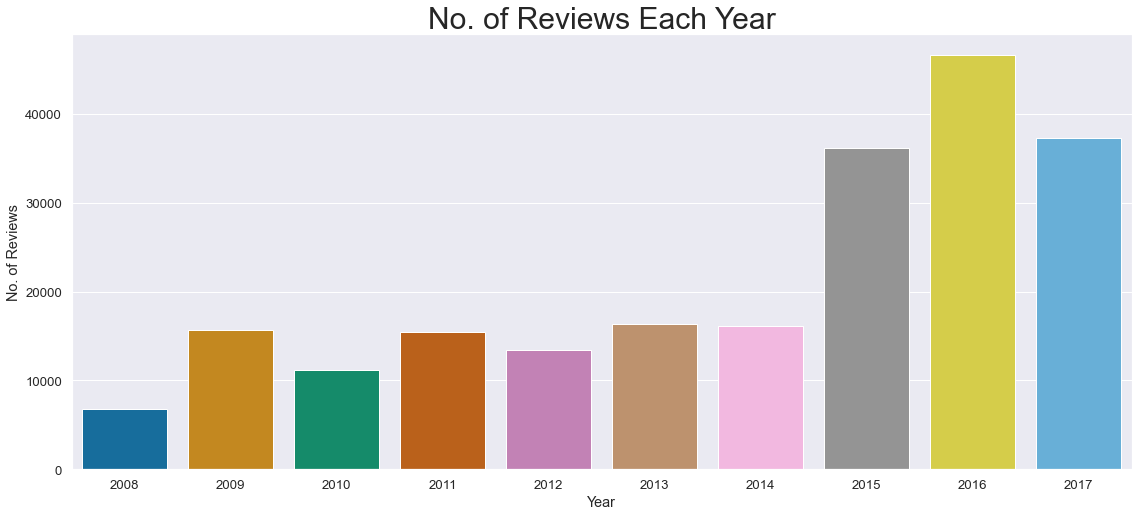

In [74]:
plt.rcParams["figure.figsize"] = (19,8)
sns.countplot(train["Year"],palette="colorblind")
plt.xlabel("Year")
plt.ylabel("No. of Reviews")
plt.title("No. of Reviews Each Year", fontsize=30)
plt.show()

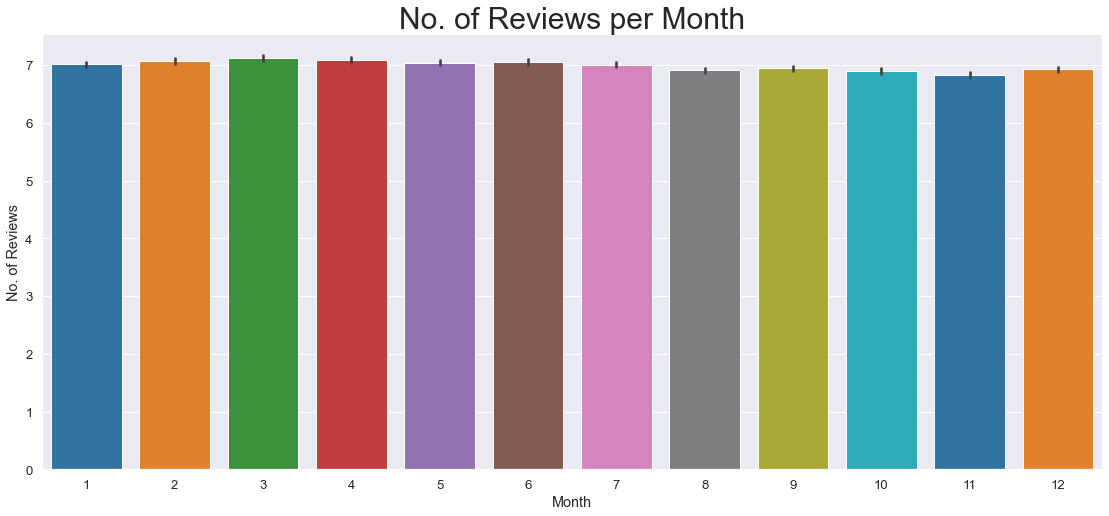

In [75]:
plt.rcParams["figure.figsize"] = (19,8)
sns.barplot(train["Month"],train["rating"], palette="tab10")
plt.xlabel("Month")
plt.ylabel("No. of Reviews")
plt.title("No. of Reviews per Month", fontsize=30)
plt.show()

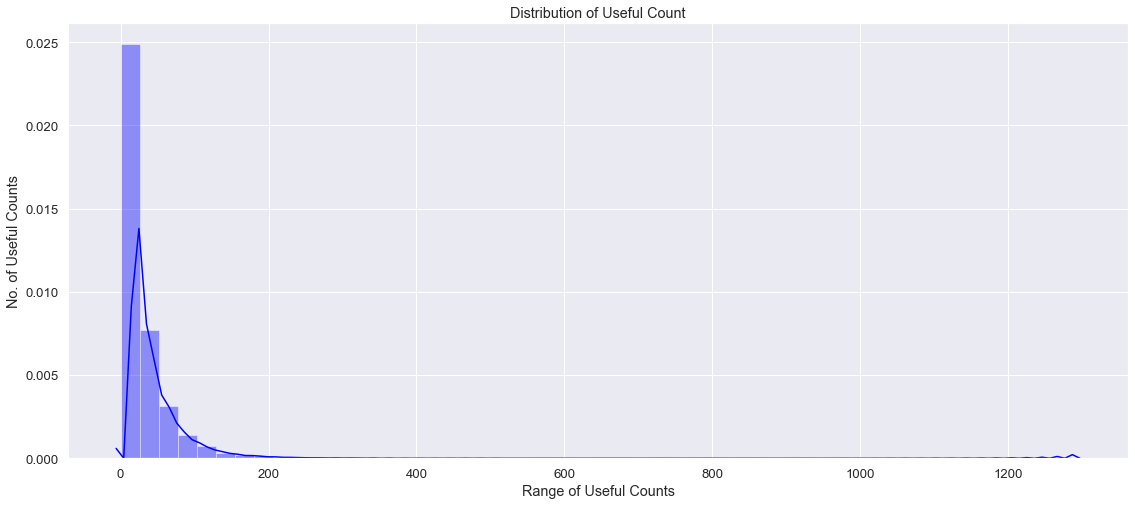

In [76]:
plt.rcParams["figure.figsize"] = (19,8)
sns.distplot(train["usefulCount"],color="blue")
plt.xlabel("Range of Useful Counts")
plt.ylabel("No. of Useful Counts")
plt.title("Distribution of Useful Count")
plt.show()

In [77]:
def review_clean(review):
    lower = review.str.lower()
    pattern_remove = lower.str.replace("&#039;","")
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]'," ")
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+'," ")
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$'," ")
    multiw_remove = whitespace_remove.str.replace(r"\s+"," ")
    dataframe = multiw_remove.replace(r"\.{2}"," ")
    return dataframe

In [78]:
train["Clean_Review"] = review_clean(train["review"])

In [79]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings;warnings.simplefilter("ignore")
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

stop_words = set(stopwords.words("english"))
train["Clean_Review"] = train["Clean_Review"].apply(lambda x:" ".join(word for word in x.split() if word not in stop_words))

In [80]:
%%time
Snow_ball = SnowballStemmer("english")
train["Clean_Review"] = train["Clean_Review"].apply(lambda x:" ".join(Snow_ball.stem(word) for word in x.split()))

Wall time: 2min 27s


In [81]:
def sentiment(review):
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
        return pol

In [82]:
train["Sentiment"] = pd.Series(sentiment(train["review"]))

In [83]:
train["Clean_Sentiment"] = pd.Series(sentiment(train["Clean_Review"]))

In [84]:
# Cleaning the reviews without removing the stopwords and using Snowball Stemmer   
train["Clean_Review_SS"] = review_clean(train["review"])
train["Clean_Sentiment_SS"] = pd.Series(sentiment(train["Clean_Review_SS"]))

In [85]:
#train = train.dropna(how="any",axis=0)
train.isna().sum()

uniqueID                   0
drugName                   0
condition               1194
review                     0
rating                     0
date                       0
usefulCount                0
Review_Sentiment           0
Year                       0
Month                      0
Days                       0
Clean_Review               0
Sentiment             215061
Clean_Sentiment       215061
Clean_Review_SS            0
Clean_Sentiment_SS    215061
dtype: int64

In [86]:
# Count Words in every review
train["Count_Words"] = train["Clean_Review_SS"].apply(lambda x: len(str(x).split()))

# Count No. of Unique Words
train["Count_Unique_Words"] = train["Clean_Review_SS"].apply(lambda x: len(set(str(x).split())))

# Count total No. of Stopwords
train["Count_Stopwords"] = train["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

# Average length of words in every review
train["Mean_Word_Length"] = train["review"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
train

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,Month,Days,Clean_Review,Sentiment,Clean_Sentiment,Clean_Review_SS,Clean_Sentiment_SS,Count_Words,Count_Unique_Words,Count_Stopwords,Mean_Word_Length
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,1.0,2012,5,20,side effect take combin bystol 5 mg fish oil,0.0,0.0,it has no side effect i take it in combinatio...,0.0,17,16,7,3.705882
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1.0,2010,4,27,son halfway fourth week intuniv becam concern ...,NaN,NaN,my son is halfway through his fourth week of ...,NaN,141,97,69,4.248227
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,1.0,2009,12,14,use take anoth oral contracept 21 pill cycl ha...,NaN,NaN,i used to take another oral contraceptive whi...,NaN,134,89,59,4.634328
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,1.0,2015,11,3,first time use form birth control im glad went...,NaN,NaN,this is my first time using any form of birth...,NaN,91,58,45,4.044944
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,1.0,2016,11,27,suboxon complet turn life around feel healthie...,NaN,NaN,suboxone has completely turned my life around...,NaN,125,85,60,4.725806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,2014-09-13,43,1.0,2014,9,13,taken tamoxifen 5 year side effect sever sweat...,NaN,NaN,i have taken tamoxifen for 5 years side effec...,NaN,97,70,42,4.505155
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,2016-10-08,11,1.0,2016,10,8,ive take lexapro escitaploprgram sinc februari...,NaN,NaN,ive been taking lexapro escitaploprgram since...,NaN,132,89,56,4.876923
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,2010-11-15,7,1.0,2010,11,15,im marri 34 year old kid take pill hassl decid...,NaN,NaN,im married 34 years old and i have no kids ta...,NaN,150,98,73,4.241611
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,2011-11-28,20,0.0,2011,11,28,prescrib nucynta sever neck shoulder pain take...,NaN,NaN,i was prescribed nucynta for severe neck shou...,NaN,35,29,14,4.911765


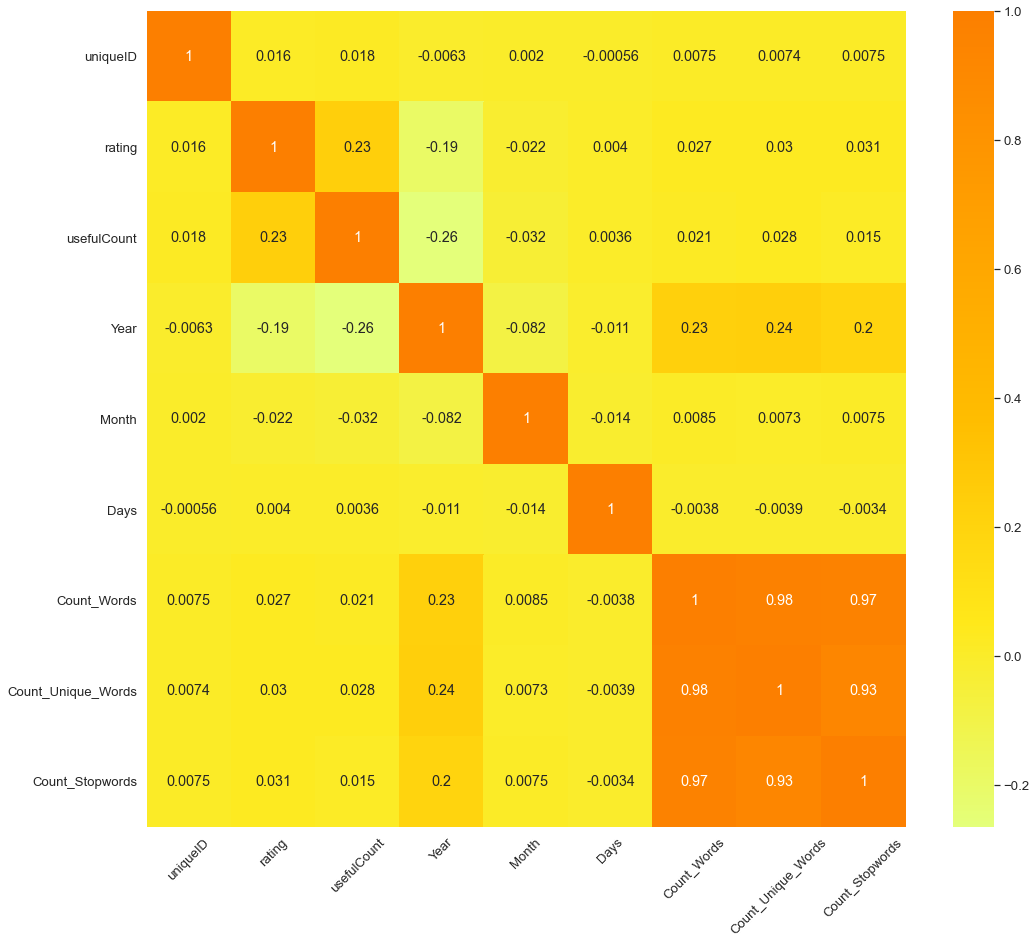

In [87]:
# Correlation Matrix of training dataset

plt.rcParams["figure.figsize"] = [17,15]
sns.set(font_scale=1.2)
corr = train.select_dtypes(include="int64").corr()
sns_h = sns.heatmap(corr, annot=True,cmap="Wistia")
plt.setp(sns_h.get_xticklabels(), rotation=45);

In [88]:
from sklearn.preprocessing import LabelEncoder
label_encoder = {}
for feature in ["drugName","condition"]:
    label_encoder[feature] = LabelEncoder()
    train[feature] = label_encoder[feature].fit_transform(train[feature])

In [89]:
from xgboost import XGBClassifier
from lightgbm import LGBMModel, LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [90]:
features = train[['condition', 'usefulCount', 'Days', 'Month', 'Year',
                  'Count_Words', 'Count_Unique_Words',
                  'Count_Stopwords', 'Mean_Word_Length']]
target = train["Review_Sentiment"]
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(150544, 9)
(64519, 9)


In [56]:
train.isna().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [91]:
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.8664579426215533
The confusion Matrix is 


array([[ 9987,  6103],
       [ 2513, 45916]], dtype=int64)

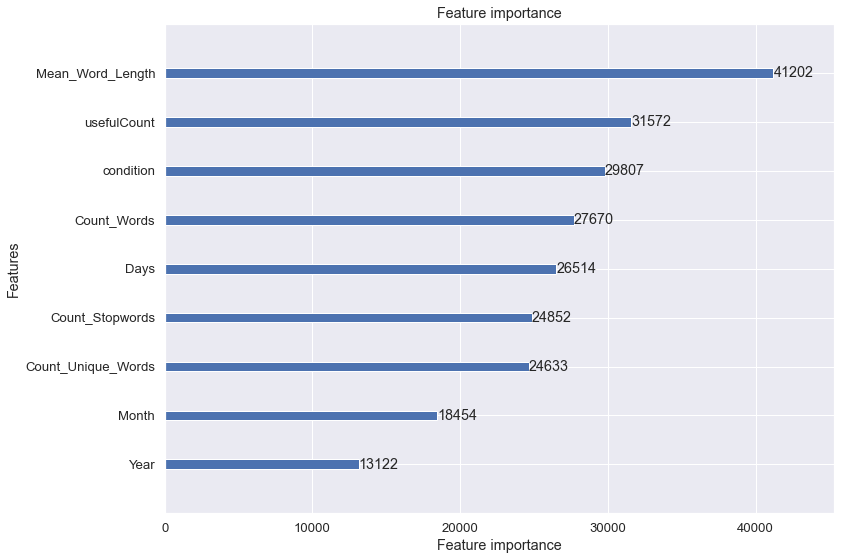

In [92]:
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'darkgrid', font_scale = 1.2)
plot_importance(model);